#Exploring Portuguese Bank Loan Data

Dataset Refrence: Kaggle Link: https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('/Users/gauravsharma/Documents/Term 3/MLP/Datasets/bank_cleaned.csv')

In [3]:
df.head()

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           5   35    management  married   tertiary      no      231     yes   
4           6   28    management   single   tertiary      no      447     yes   

  loan  day month  duration  campaign  pdays  previous poutcome response  \
0   no    5   may      4.35         1     -1         0  unknown       no   
1   no    5   may      2.52         1     -1         0  unknown       no   
2  yes    5   may      1.27         1     -1         0  unknown       no   
3   no    5   may      2.32         1     -1         0  unknown       no   
4  yes    5   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1                0  
2                0  
3                0  
4                0

In [4]:
df.tail()

Unnamed: 0  age          job   marital  education default  balance  \
40836       45205   25   technician    single  secondary      no      505   
40837       45206   51   technician   married   tertiary      no      825   
40838       45207   71      retired  divorced    primary      no     1729   
40839       45208   72      retired   married  secondary      no     5715   
40840       45209   57  blue-collar   married  secondary      no      668   

      housing loan  day month  duration  campaign  pdays  previous poutcome  \
40836      no  yes   17   nov      6.43         2     -1         0  unknown   
40837      no   no   17   nov     16.28         3     -1         0  unknown   
40838      no   no   17   nov      7.60         2     -1         0  unknown   
40839      no   no   17   nov     18.78         5    184         3  success   
40840      no   no   17   nov      8.47         4     -1         0  unknown   

      response  response_binary  
40836      yes                1  
40837      yes                1  
40838      yes                1  
40839      yes                1  
40840       no                0

In [5]:
df.describe()

Unnamed: 0           age       balance           day      duration  \
count  40841.000000  40841.000000  40841.000000  40841.000000  40841.000000   
mean   22006.477657     40.790676   1073.981807     15.863666      4.308949   
std    12919.797651     10.475473   1712.556186      8.313608      4.305823   
min        0.000000     18.000000  -6847.000000      1.000000      0.100000   
25%    10888.000000     33.000000     64.000000      8.000000      1.730000   
50%    21652.000000     39.000000    421.000000     16.000000      3.000000   
75%    33102.000000     48.000000   1333.000000     21.000000      5.300000   
max    45209.000000     95.000000  10443.000000     31.000000     81.970000   

           campaign         pdays      previous  response_binary  
count  40841.000000  40841.000000  40841.000000     40841.000000  
mean       2.774149     32.248304      0.436791         0.113587  
std        3.104177     90.738402      1.572342         0.317313  
min        1.000000     -1.000000      0.000000         0.000000  
25%        1.000000     -1.000000      0.000000         0.000000  
50%        2.000000     -1.000000      0.000000         0.000000  
75%        3.000000     -1.000000      0.000000         0.000000  
max       58.000000    871.000000     55.000000         1.000000

In [6]:
df.drop(['Unnamed: 0','response'], axis=1, inplace=True)

In [7]:
df.dropna()

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       35    management   married   tertiary      no      231     yes   no   
4       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
40836   25    technician    single  secondary      no      505      no  yes   
40837   51    technician   married   tertiary      no      825      no   no   
40838   71       retired  divorced    primary      no     1729      no   no   
40839   72       retired   married  secondary      no     5715      no   no   
40840   57   blue-collar   married  secondary      no      668      no   no   

       day month  duration  campaign  pdays  previous poutcome  \
0        5   may      4.35         1     -1         0  unknown   
1        5   may      2.52         1     -1         0  unknown   
2        5   may      1.27         1     -1         0  unknown   
3        5   may      2.32         1     -1         0  unknown   
4        5   may      3.62         1     -1         0  unknown   
...    ...   ...       ...       ...    ...       ...      ...   
40836   17   nov      6.43         2     -1         0  unknown   
40837   17   nov     16.28         3     -1         0  unknown   
40838   17   nov      7.60         2     -1         0  unknown   
40839   17   nov     18.78         5    184         3  success   
40840   17   nov      8.47         4     -1         0  unknown   

       response_binary  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
40836                1  
40837                1  
40838                1  
40839                1  
40840                0  

[40841 rows x 16 columns]

In [8]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       35    management   married   tertiary      no      231     yes   no   
4       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
40836   25    technician    single  secondary      no      505      no  yes   
40837   51    technician   married   tertiary      no      825      no   no   
40838   71       retired  divorced    primary      no     1729      no   no   
40839   72       retired   married  secondary      no     5715      no   no   
40840   57   blue-collar   married  secondary      no      668      no   no   

       day month  d

In [9]:
df.shape

(40841, 16)

In [10]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response_binary      int64
dtype: object

In [11]:
df.nunique()

age                  75
job                  12
marital               3
education             3
default               2
balance            6350
housing               2
loan                  2
day                  31
month                12
duration           1539
campaign             47
pdays               510
previous             36
poutcome              3
response_binary       2
dtype: int64

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

In [13]:
df.corr()

age   balance       day  duration  campaign     pdays  \
age              1.000000  0.103405 -0.010549 -0.007422  0.003563 -0.005815   
balance          0.103405  1.000000  0.008062  0.035481 -0.026482  0.017674   
day             -0.010549  0.008062  1.000000 -0.032656  0.172387 -0.089812   
duration        -0.007422  0.035481 -0.032656  1.000000 -0.081852 -0.000242   
campaign         0.003563 -0.026482  0.172387 -0.081852  1.000000 -0.094891   
pdays           -0.005815  0.017674 -0.089812 -0.000242 -0.094891  1.000000   
previous         0.012862  0.036765 -0.056279  0.004824 -0.051522  0.567728   
response_binary  0.023204  0.069456 -0.035323  0.400681 -0.072495  0.108554   

                 previous  response_binary  
age              0.012862         0.023204  
balance          0.036765         0.069456  
day             -0.056279        -0.035323  
duration         0.004824         0.400681  
campaign        -0.051522        -0.072495  
pdays            0.567728         0.108554  
previous         1.000000         0.128274  
response_binary  0.128274         1.000000

In [14]:
df.job.value_counts()

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [15]:
df.marital.value_counts()

married     24641
single      11443
divorced     4757
Name: marital, dtype: int64

In [16]:
df.education.value_counts()

secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64

In [17]:
df.default.value_counts()

no     40078
yes      763
Name: default, dtype: int64

In [18]:
df.housing.value_counts()

yes    22820
no     18021
Name: housing, dtype: int64

In [19]:
df.loan.value_counts()

no     34042
yes     6799
Name: loan, dtype: int64

In [20]:
df.poutcome.value_counts()

unknown    34802
failure     4648
success     1391
Name: poutcome, dtype: int64

In [21]:
df.month.value_counts()

may    12496
jul     6520
aug     5877
jun     4853
nov     3483
apr     2529
feb     2258
jan     1183
oct      605
sep      457
mar      407
dec      173
Name: month, dtype: int64

In [22]:
df.response_binary.value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [23]:
pd.crosstab(df['job'] , df['response_binary'])

response_binary     0     1
job                        
admin.           4142   563
blue-collar      8168   637
entrepreneur     1231   109
housemaid        1048   101
management       7440  1125
other             143    15
retired          1572   448
self-employed    1281   162
services         3469   332
student           486   203
technician       6200   754
unemployed       1022   190

In [24]:
pd.crosstab(df['marital'] , df['response_binary'])

response_binary      0     1
marital                     
divorced          4205   552
married          22228  2413
single            9769  1674

In [25]:
pd.crosstab(df['education'] , df['response_binary'])

response_binary      0     1
education                   
primary           5981   547
secondary        19654  2279
tertiary         10567  1813

In [26]:
pd.crosstab(df['default'] , df['response_binary'])

response_binary      0     1
default                     
no               35485  4593
yes                717    46

In [27]:
pd.crosstab(df['housing'] , df['response_binary'])

response_binary      0     1
housing                     
no               15119  2902
yes              21083  1737

In [28]:
pd.crosstab(df['loan'] , df['response_binary'])

response_binary      0     1
loan                        
no               29857  4185
yes               6345   454

In [29]:
pd.crosstab(df['poutcome'] , df['response_binary'])

response_binary      0     1
poutcome                    
failure           4069   579
success            495   896
unknown          31638  3164

In [30]:
pd.crosstab(df['month'] , df['response_binary'])

response_binary      0    1
month                      
apr               2033  496
aug               5263  614
dec                 94   79
feb               1868  390
jan               1061  122
jul               5968  552
jun               4363  490
mar                186  221
may              11670  826
nov               3129  354
oct                333  272
sep                234  223

In [31]:
df[['balance','response_binary']].sort_values('balance', ascending = False)

balance  response_binary
24037    10443                0
9062     10442                0
13721    10438                0
6077     10436                0
3266     10399                0
...        ...              ...
30290    -3058                1
1766     -3313                0
6981     -3372                0
35504    -4057                0
14739    -6847                0

[40841 rows x 2 columns]

In [32]:
df.duration.mean()

4.308949340123857

In [33]:
df.balance.mean()

1073.9818074973678

In [34]:
df.groupby(by =['education']).size()

education
primary       6528
secondary    21933
tertiary     12380
dtype: int64

In [35]:
df.groupby(by =['job']).size()

job
admin.           4705
blue-collar      8805
entrepreneur     1340
housemaid        1149
management       8565
other             158
retired          2020
self-employed    1443
services         3801
student           689
technician       6954
unemployed       1212
dtype: int64

In [36]:
df.groupby(by =['marital']).size()

marital
divorced     4757
married     24641
single      11443
dtype: int64

In [37]:
df.groupby(by =['loan']).size()

loan
no     34042
yes     6799
dtype: int64

In [38]:
df.groupby(by =['housing']).size()

housing
no     18021
yes    22820
dtype: int64

In [39]:
df.groupby(by =['job', 'housing']).size()

job            housing
admin.         no         1788
               yes        2917
blue-collar    no         2428
               yes        6377
entrepreneur   no          559
               yes         781
housemaid      no          771
               yes         378
management     no         4349
               yes        4216
other          no          140
               yes          18
retired        no         1562
               yes         458
self-employed  no          745
               yes         698
services       no         1269
               yes        2532
student        no          481
               yes         208
technician     no         3220
               yes        3734
unemployed     no          709
               yes         503
dtype: int64

In [40]:
df.groupby(by =['marital', 'housing']).size()

marital   housing
divorced  no          2112
          yes         2645
married   no         10692
          yes        13949
single    no          5217
          yes         6226
dtype: int64

In [41]:
df.groupby(by =['education', 'housing']).size()

education  housing
primary    no          2825
           yes         3703
secondary  no          8698
           yes        13235
tertiary   no          6498
           yes         5882
dtype: int64

In [42]:
df.groupby(by =['job', 'housing', 'loan']).size()

job            housing  loan
admin.         no       no      1416
                        yes      372
               yes      no      2348
                        yes      569
blue-collar    no       no      1903
                        yes      525
               yes      no      5333
                        yes     1044
entrepreneur   no       no       424
                        yes      135
               yes      no       594
                        yes      187
housemaid      no       no       682
                        yes       89
               yes      no       321
                        yes       57
management     no       no      3832
                        yes      517
               yes      no      3555
                        yes      661
other          no       no       138
                        yes        2
               yes      no        16
                        yes        2
retired        no       no      1366
                        yes      196
         

In [43]:
df.groupby(by =['job', 'education', 'loan']).size()

job         education  loan
admin.      primary    no       165
                       yes       35
            secondary  no      3144
                       yes      819
            tertiary   no       455
                               ... 
unemployed  primary    yes       17
            secondary  no       619
                       yes       70
            tertiary   no       258
                       yes       19
Length: 70, dtype: int64

In [44]:
df.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response_binary    0
dtype: int64

In [45]:
[df.duplicated(keep = 'last')]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 40836    False
 40837    False
 40838    False
 40839    False
 40840    False
 Length: 40841, dtype: bool]

In [46]:
df.groupby('marital').agg({'balance': ['min', 'max'], 'age': ['mean','median'], 'campaign': 'count'})

balance               age        campaign
             min    max       mean median    count
marital                                           
divorced   -4057  10399  45.588606     45     4757
married    -6847  10443  43.157705     42    24641
single     -2604  10442  33.699030     32    11443

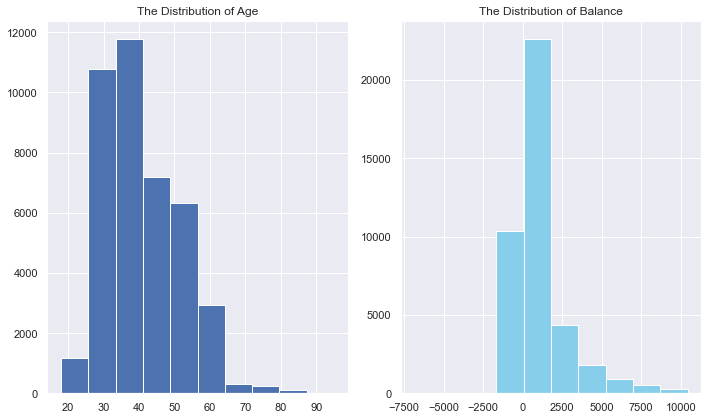

In [47]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


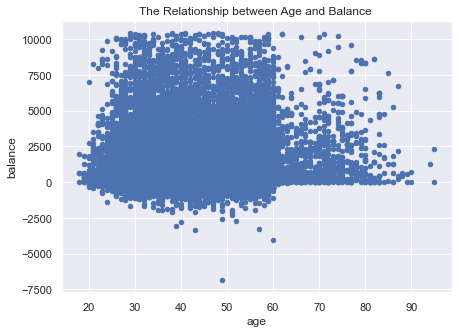

In [48]:
scatter_age_balance = df.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

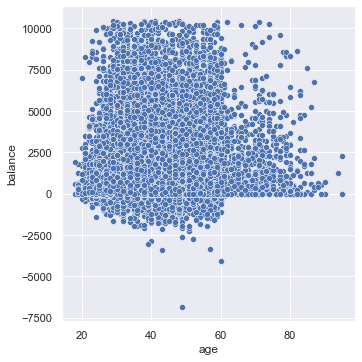

In [49]:
sns.relplot(x='age',y='balance',kind='scatter',cmap='winter',data=df)

<AxesSubplot:xlabel='job', ylabel='count'>

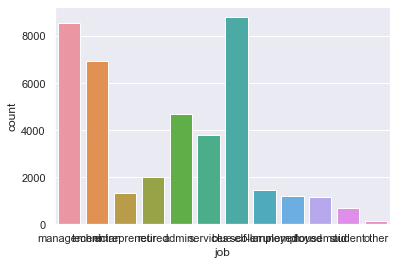

In [50]:
sns.countplot(x = 'job', data = df)

<AxesSubplot:xlabel='housing', ylabel='count'>

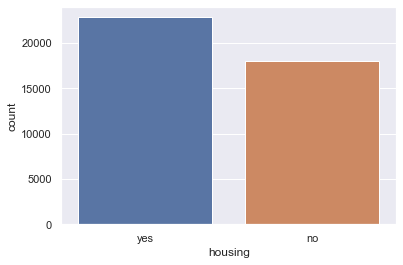

In [51]:
sns.countplot(x = 'housing', data = df)

<AxesSubplot:xlabel='loan', ylabel='count'>

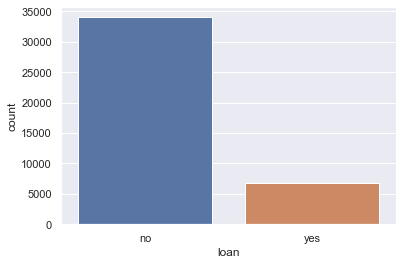

In [52]:
sns.countplot(x = 'loan', data = df)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

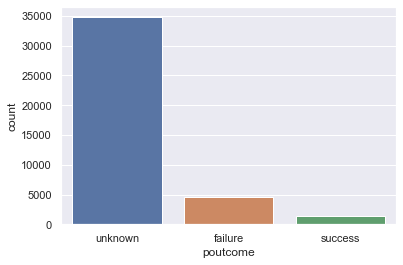

In [53]:
sns.countplot(x = 'poutcome', data = df)

<AxesSubplot:xlabel='month', ylabel='count'>

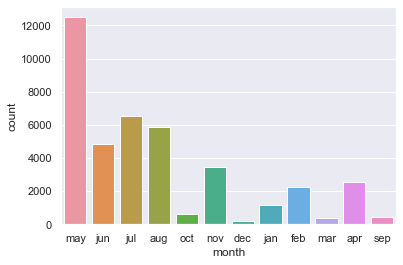

In [54]:
sns.countplot(x = 'month', data = df)

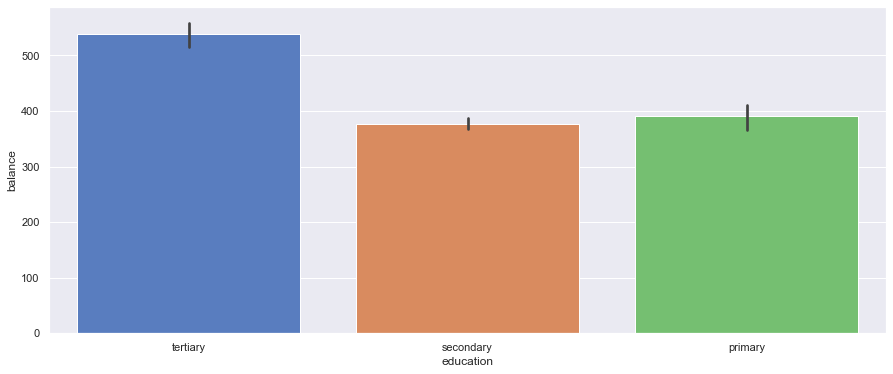

In [55]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'education',y = 'balance', data = df, 
            estimator = np.median,palette = 'muted')
plt.show()

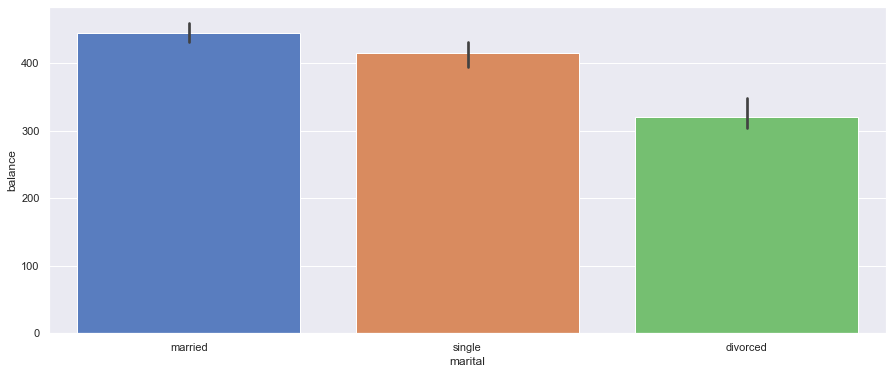

In [56]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'marital',y = 'balance', data = df, 
            estimator = np.median,palette = 'muted')
plt.show()

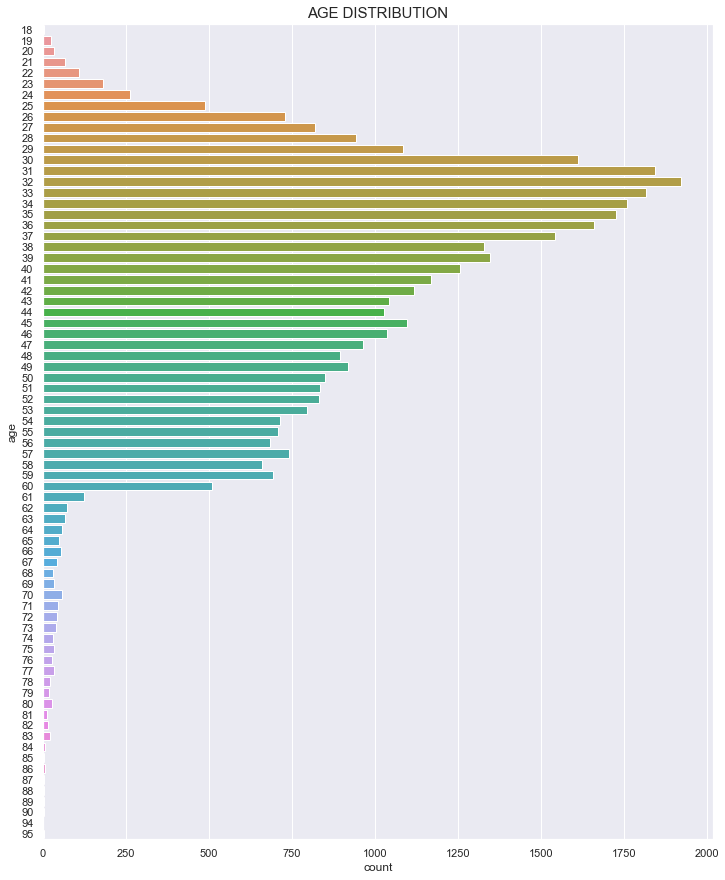

In [57]:
plt.figure(figsize = (12, 15))
sns.countplot(y = df['age'], data = df)
plt.title("AGE DISTRIBUTION", fontdict = {'fontsize': 15})
plt.show()

In [58]:
fig = px.pie(data_frame = df, names='marital', title = 'Marital Status', hole = 0.2)
fig.show()

In [59]:
fig = px.pie(data_frame = df, names = 'education', title = 'Education', hole = 0.2)
fig.show()

In [60]:
fig = px.pie(data_frame = df, names = 'job', title = 'Job Distribution', hole = 0.2)
fig.show()

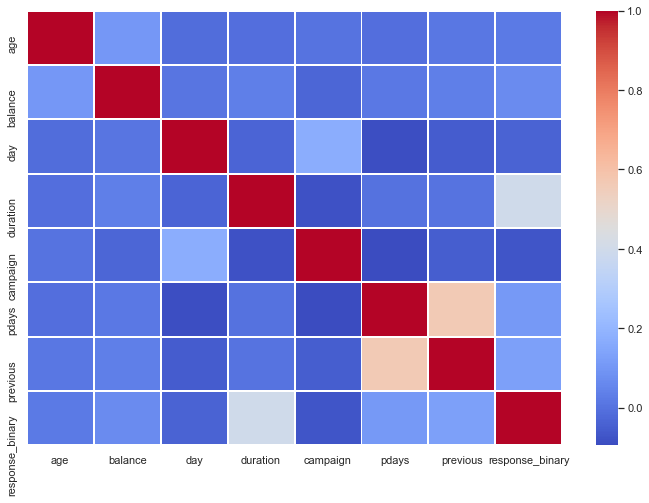

In [61]:
plt.figure(figsize = (12, 8))
corr = df.corr()
sns.heatmap(corr, linecolor = 'white', linewidths = 1, cmap = 'coolwarm')
plt.show()

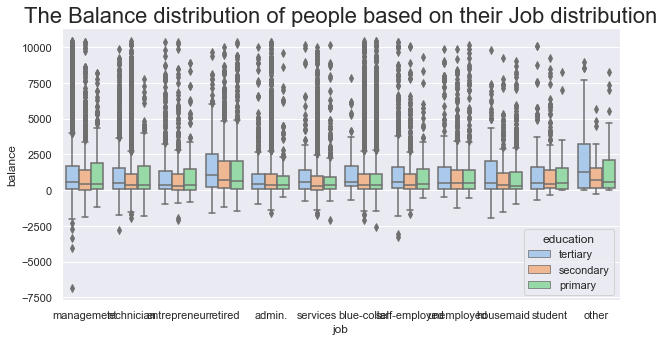

In [62]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'job',y = 'balance',
            hue = 'education',palette = 'pastel', data = df)
plt.title('The Balance distribution of people based on their Job distribution',fontsize = 22)
plt.show()

<AxesSubplot:xlabel='job', ylabel='response_binary'>

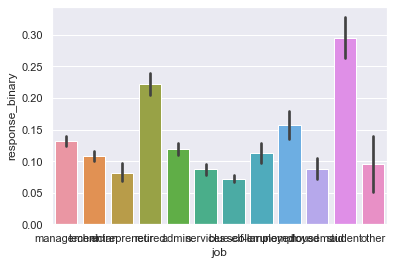

In [63]:
sns.barplot(x = 'job', y = 'response_binary', data = df)

<AxesSubplot:xlabel='marital', ylabel='response_binary'>

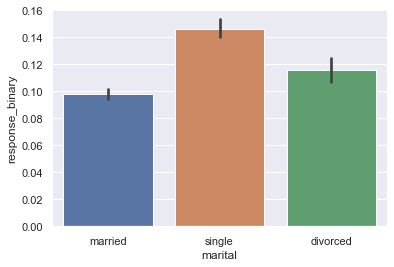

In [64]:
sns.barplot(x = 'marital', y = 'response_binary', data = df)

<AxesSubplot:xlabel='education', ylabel='response_binary'>

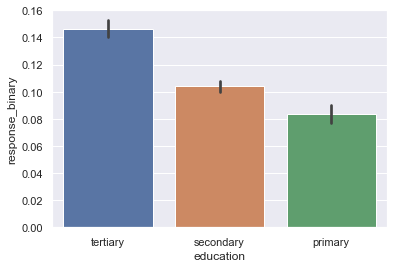

In [65]:
sns.barplot(x = 'education', y = 'response_binary', data = df)

<AxesSubplot:xlabel='default', ylabel='response_binary'>

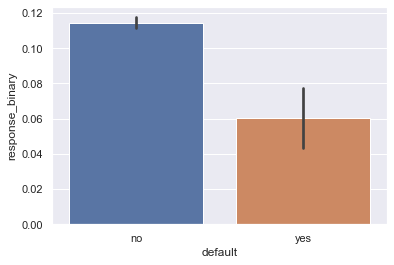

In [66]:
sns.barplot(x = 'default', y = 'response_binary', data = df)

<AxesSubplot:xlabel='housing', ylabel='response_binary'>

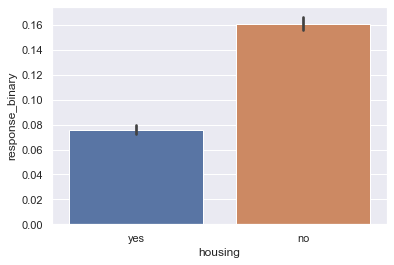

In [67]:
sns.barplot(x = 'housing', y = 'response_binary', data = df)

<AxesSubplot:xlabel='loan', ylabel='response_binary'>

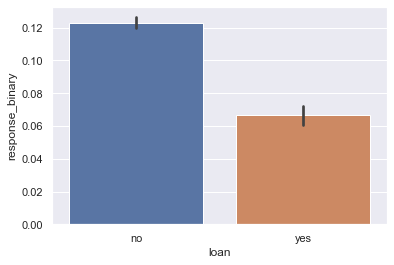

In [68]:
sns.barplot(x = 'loan', y = 'response_binary', data = df)

<AxesSubplot:xlabel='poutcome', ylabel='response_binary'>

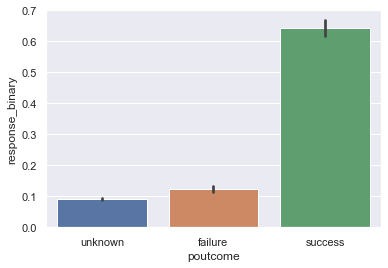

In [69]:
sns.barplot(x = 'poutcome', y = 'response_binary', data = df)

<AxesSubplot:xlabel='month', ylabel='response_binary'>

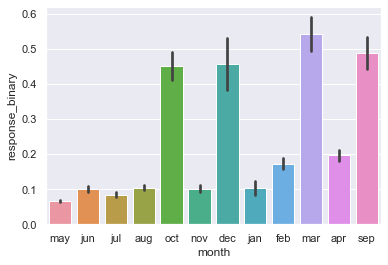

In [70]:
sns.barplot(x = 'month', y = 'response_binary', data = df)

<AxesSubplot:xlabel='response_binary', ylabel='age'>

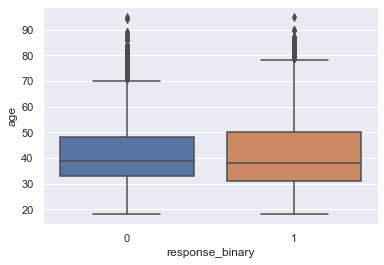

In [71]:
sns.boxplot(x = 'response_binary', y = 'age', data = df)

<AxesSubplot:xlabel='response_binary', ylabel='balance'>

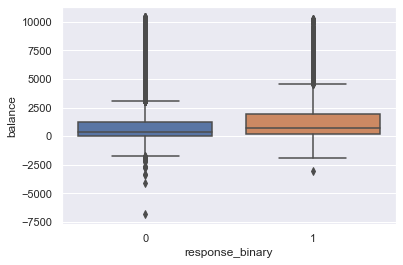

In [72]:
sns.boxplot(x = 'response_binary', y = 'balance', data = df)

<AxesSubplot:xlabel='response_binary', ylabel='duration'>

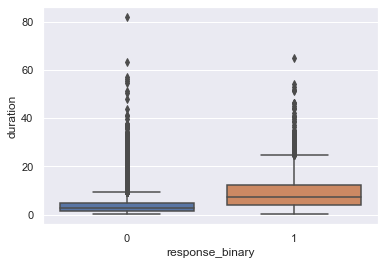

In [73]:
sns.boxplot(x = 'response_binary', y = 'duration', data = df)

In [74]:
#KNN Classification

In [75]:
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

In [79]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
X_train[cat_atr].head()

job  marital  education  default  housing  loan  poutcome  month
8006     1        1          0        0        1     0         2      6
6900     1        1          1        0        1     1         2      8
19270    3        1          1        0        0     0         2      1
5185     8        1          1        0        0     0         2      8
4791     4        1          2        0        1     0         2      8

In [81]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [82]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [83]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [84]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12253, 15)

In [85]:
y_pred = knn.predict(Xtr1)

In [86]:
confusion_matrix(y_test, y_pred)

array([[10553,   272],
       [ 1009,   419]])

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test, y_pred)

0.8954541744878806

In [89]:
from sklearn.metrics import precision_recall_fscore_support

In [90]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.91273136, 0.60636758]),
 array([0.97487298, 0.29341737]),
 array([0.94277929, 0.39546956]),
 array([10825,  1428]))

In [91]:
from sklearn.metrics import precision_score

In [92]:
precision_score(y_test, y_pred)

0.6063675832127352

In [93]:
from sklearn.metrics import recall_score

In [94]:
recall_score(y_test, y_pred)

0.2934173669467787

In [95]:
from sklearn.metrics import f1_score

In [96]:
f1_score(y_test, y_pred)

0.39546956111373294

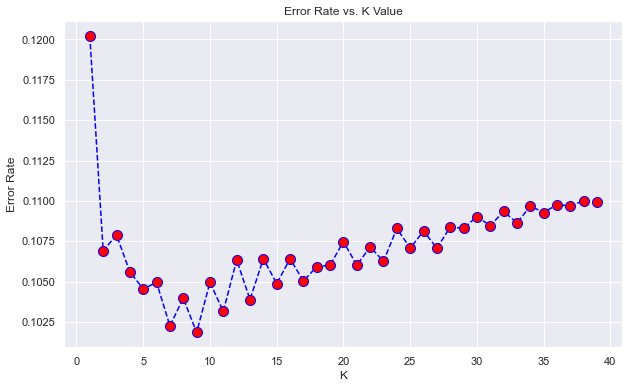

Minimum error:- 0.10185260752468783 at K = 9


In [97]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [98]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [99]:
y_pred = knn.predict(Xtr1)

In [100]:
accuracy_score(y_test, y_pred)

0.8981473924753122

In [101]:
# Decision Tree Algorithm

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [104]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [105]:
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [106]:
y.shape

(40841,)

In [107]:
X.shape

(40841, 15)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
X_train[cat_atr].head()

job  marital  education  default  housing  loan  poutcome  month
8006     1        1          0        0        1     0         2      6
6900     1        1          1        0        1     1         2      8
19270    3        1          1        0        0     0         2      1
5185     8        1          1        0        0     0         2      8
4791     4        1          2        0        1     0         2      8

In [111]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [112]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [113]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.75532761, -0.60333254, -1.79967387, ...,  0.41730953,
        -0.36216712, -0.27696495],
       [ 1.27615324,  1.6692781 ,  0.47743515, ..., -0.24162006,
         1.74588719,  1.00535189],
       [-1.31138838, -0.27669877, -1.32028249, ..., -0.57108486,
        -0.36216712, -0.27696495],
       ...,
       [-0.25720475,  0.76369029, -1.79967387, ..., -0.24162006,
        -0.36216712, -0.27696495],
       [-0.4488745 , -0.62925586, -1.08058681, ..., -0.24162006,
         3.4839107 ,  0.36419347],
       [ 0.41363937,  0.79018968,  1.55606574, ..., -0.24162006,
        -0.36216712, -0.27696495]])

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12253, 15)

In [114]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [115]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [116]:
y_pred = dt.predict(Xtr1)

In [117]:
np.sum((y_test == y_pred))/y_test.size
# Accuracy is 87.42%

0.8747245572512854

In [118]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

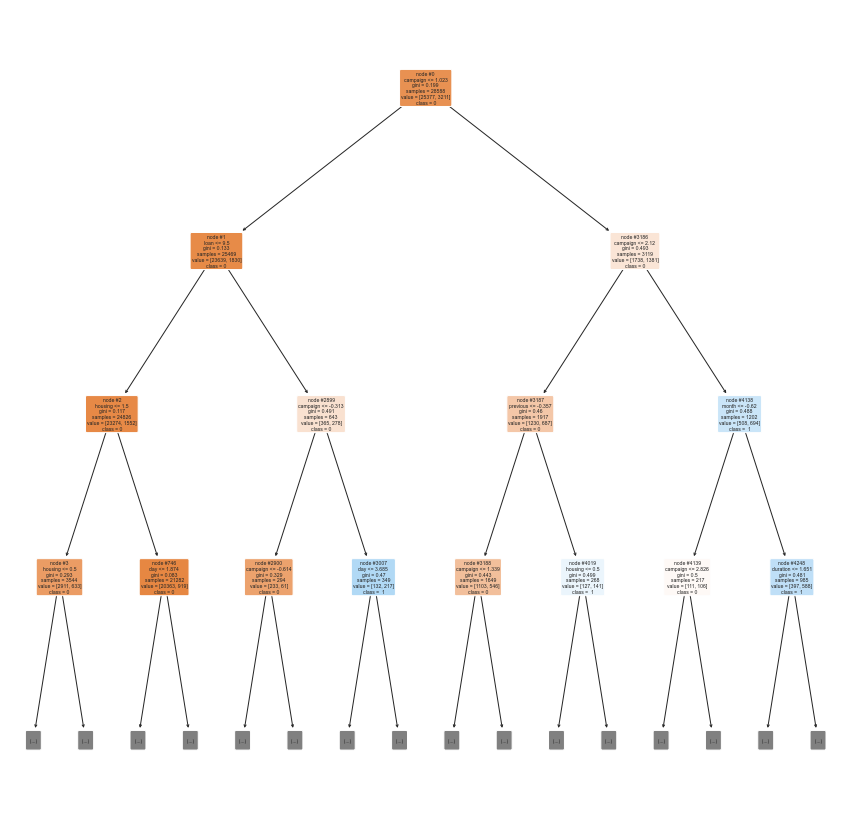

In [119]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [120]:
# Random Forest Classification Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
X_train[cat_atr].head()

job  marital  education  default  housing  loan  poutcome  month
8006     1        1          0        0        1     0         2      6
6900     1        1          1        0        1     1         2      8
19270    3        1          1        0        0     0         2      1
5185     8        1          1        0        0     0         2      8
4791     4        1          2        0        1     0         2      8

In [127]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [128]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [129]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.75532761, -0.60333254, -1.79967387, ...,  0.41730953,
        -0.36216712, -0.27696495],
       [ 1.27615324,  1.6692781 ,  0.47743515, ..., -0.24162006,
         1.74588719,  1.00535189],
       [-1.31138838, -0.27669877, -1.32028249, ..., -0.57108486,
        -0.36216712, -0.27696495],
       ...,
       [-0.25720475,  0.76369029, -1.79967387, ..., -0.24162006,
        -0.36216712, -0.27696495],
       [-0.4488745 , -0.62925586, -1.08058681, ..., -0.24162006,
         3.4839107 ,  0.36419347],
       [ 0.41363937,  0.79018968,  1.55606574, ..., -0.24162006,
        -0.36216712, -0.27696495]])

/Users/gauravsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12253, 15)

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [132]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.906716722435322


In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[10531,   294],
       [  849,   579]])

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10825
           1       0.66      0.41      0.50      1428

    accuracy                           0.91     12253
   macro avg       0.79      0.69      0.73     12253
weighted avg       0.89      0.91      0.90     12253



In [135]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
df.feature_names = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome']]
df.target_names = df['response_binary']

<ipython-input-136-eeee48a55ae5>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

<ipython-input-136-eeee48a55ae5>:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [137]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

10    0.300730
5     0.115637
0     0.110514
8     0.094680
9     0.088351
1     0.050012
14    0.047587
12    0.046341
11    0.042484
6     0.024008
3     0.023426
2     0.023149
13    0.020854
7     0.010210
4     0.002019
dtype: float64

In [138]:
list(zip(df.columns, feature_imp))

[('age', 0.3007300831174106),
 ('job', 0.11563653709300196),
 ('marital', 0.11051433259070861),
 ('education', 0.09467965539007162),
 ('default', 0.08835142288122015),
 ('balance', 0.0500117290411849),
 ('housing', 0.04758672958077328),
 ('loan', 0.046340951012336304),
 ('day', 0.042483531084857945),
 ('month', 0.024008465928369215),
 ('duration', 0.023426117907132928),
 ('campaign', 0.02314881719557893),
 ('pdays', 0.020853522584109538),
 ('previous', 0.01020951567994378),
 ('poutcome', 0.002018588913300246)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


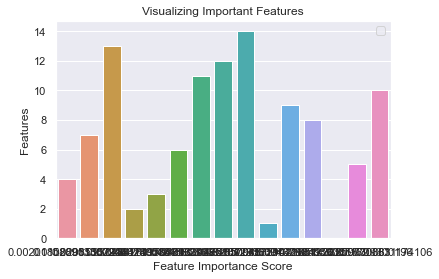

In [139]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [140]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.9059822084387497


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10825
           1       0.66      0.40      0.50      1428

    accuracy                           0.91     12253
   macro avg       0.79      0.69      0.72     12253
weighted avg       0.89      0.91      0.90     12253

